In [ ]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Neutral     136
Positive     69
Negative     42
Name: sentiment, dtype: int64
sentiment
Negative   -0.410317
Neutral     0.000190
Positive    0.440259
Name: compound, dtype: float64
                                               title  score       id  upvotes  \
0                                           Accurate    662  10pfei1      662   
1  I asked new Bing chat to just expand a 200 wor...    508  11kavbz      508   
2  ChatGPT is the single best learning tool I've ...    459   zcqkfj      459   
3  Meta prompt engineering: ChatGPT creates amazi...    433  11b08ug      433   
4                         It makes some good points.    430  108u7a2      430   
5  ChatGPT now thinks it knows how to be a parent...    414  109ew4l      414   
6                             The AI is dirty minded    275   zsi8wb      275   
7                 Just heard a ChatGPT School Speech    266  10a11w5      266   
8                   I'm a teacher and I love ChatGPT    255   ztrpnc      255   
9  Make 

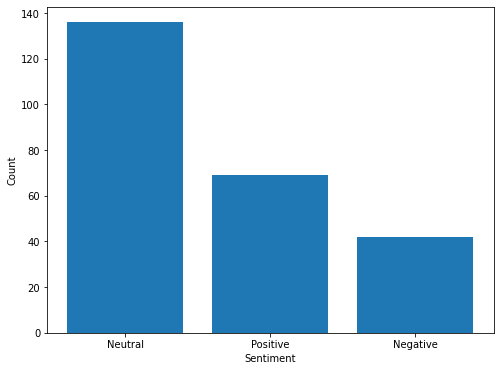

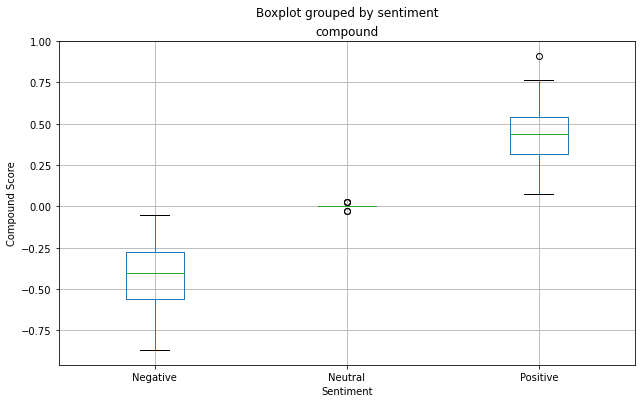

In [ ]:
# Load the Reddit data from CSV file into a pandas dataframe
reddit_data = pd.read_csv('ChatGPT_educationsubreddit.csv')

# Load the Spacy English model
nlp = spacy.load('en_core_web_sm')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to clean the text using Spacy
def clean_text(text):
    doc = nlp(text)
    cleaned_text = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return ' '.join(cleaned_text)

# Define a function to get the sentiment category based on compound score
def get_sentiment_category(compound):
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Define a function to perform sentiment analysis on each post title
def get_sentiment(title):
    cleaned_title = clean_text(title)
    scores = analyzer.polarity_scores(cleaned_title)
    compound = scores['compound']
    category = get_sentiment_category(compound)
    return category, compound

# Apply the sentiment analysis function to each post title in the dataframe
reddit_data[['sentiment', 'compound']] = reddit_data['title'].apply(get_sentiment).apply(pd.Series)

# Print the count of posts in each sentiment category
print(reddit_data['sentiment'].value_counts())

# Print the average compound score for each sentiment category
print(reddit_data.groupby('sentiment')['compound'].mean())

# Print the first 10 rows of the dataframe with sentiment scores
print(reddit_data.head(10))

# Plot the bar chart for each sentiment category
sentiment_counts = reddit_data['sentiment'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sentiment_counts.index, sentiment_counts.values)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

# Plot the box plot for each sentiment category
fig, ax = plt.subplots(figsize=(10, 6))
reddit_data.boxplot(column='compound', by='sentiment', ax=ax)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Compound Score')
plt.show()